In [1]:
#import module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read first file
data1 = pd.read_csv(r"D:\Data Science\Projects\My Projects\Project 6\ResaleFlatPricesBasedonApprovalDate19901999.csv")
data2 = pd.read_csv(r"D:\Data Science\Projects\My Projects\Project 6\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
data3 = pd.read_csv(r"D:\Data Science\Projects\My Projects\Project 6\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
data4 = pd.read_csv(r"D:\Data Science\Projects\My Projects\Project 6\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
data5 = pd.read_csv(r"D:\Data Science\Projects\My Projects\Project 6\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [3]:
# Concatenate the DataFrames along the rows axis
df = pd.concat([data1,data2,data3,data4,data5],axis = 0)
df.head()
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
176844,2024-04,YISHUN,5 ROOM,502D,YISHUN ST 51,07 TO 09,112.0,Improved,2018,725000.0,92 years 10 months
176845,2024-04,YISHUN,5 ROOM,647,YISHUN ST 61,07 TO 09,121.0,Improved,1987,668888.0,62 years 01 month
176846,2024-04,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,1080000.0,67 years 03 months
176847,2024-04,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,Apartment,1988,830000.0,63 years 04 months


In [4]:
# Retrieve the shape of the DataFrame
df.shape

(923052, 11)

In [5]:
# Calculate the number of missing values for each column
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [6]:
# Retrieve the column names of the DataFrame
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [7]:
#descriptive statistics for numerical columns
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,923052.000000,923052.000000,9.230520e+05
mean,95.693896,1988.233176,3.195157e+05
std,25.833054,10.618261,1.693595e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1981.000000,1.930000e+05
50%,93.000000,1986.000000,2.952500e+05
75%,113.000000,1996.000000,4.150000e+05
max,307.000000,2022.000000,1.568888e+06


In [8]:
df['resale_price'].value_counts()

resale_price
300000.0    6914
350000.0    6820
280000.0    6546
320000.0    6516
250000.0    6283
            ... 
315200.0       1
263880.0       1
375388.0       1
345600.0       1
335288.0       1
Name: count, Length: 9452, dtype: int64

### Data Cleaning

In [9]:
# Count the number of unique values in each column
df.nunique()

month                   412
town                     27
flat_type                 8
block                  2707
street_name             584
storey_range             25
floor_area_sqm          211
flat_model               34
lease_commence_date      56
resale_price           9452
remaining_lease         724
dtype: int64

In [10]:
#check null value
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [11]:
df['remaining_lease']

0                        NaN
1                        NaN
2                        NaN
3                        NaN
4                        NaN
                 ...        
176844    92 years 10 months
176845     62 years 01 month
176846    67 years 03 months
176847    63 years 04 months
176848    63 years 04 months
Name: remaining_lease, Length: 923052, dtype: object

In [12]:
def convert_to_years(row):
    # Code to execute if row is not NaN and is a string
    # Check if the value is not NaN and is a string
    if pd.notna(row) and isinstance(row, str):
        # Check if the string contains the word 'years'
        if 'years' in row:
            # Split the string into parts
            parts = row.split()
            # Extract the number of years
            years = float(parts[0])
            # Extract the number of months if available, otherwise set it to 0
            months = float(parts[2]) if len(parts) > 2 else 0
            # Calculate the total duration in years
            return years + months / 12
    # Return the original value if it doesn't meet the conditions
    return row 


In [13]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)

In [14]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
176844,2024-04,YISHUN,5 ROOM,502D,YISHUN ST 51,07 TO 09,112.0,Improved,2018,725000.0,92.833333
176845,2024-04,YISHUN,5 ROOM,647,YISHUN ST 61,07 TO 09,121.0,Improved,1987,668888.0,62.083333
176846,2024-04,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,1080000.0,67.250000
176847,2024-04,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,Apartment,1988,830000.0,63.333333


In [15]:
# fill null values in remaining_lease with mode beacuse null value more than 25% it will remove affected in accuracy
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
176844,2024-04,YISHUN,5 ROOM,502D,YISHUN ST 51,07 TO 09,112.0,Improved,2018,725000.0,92.833333
176845,2024-04,YISHUN,5 ROOM,647,YISHUN ST 61,07 TO 09,121.0,Improved,1987,668888.0,62.083333
176846,2024-04,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,1080000.0,67.250000
176847,2024-04,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,Apartment,1988,830000.0,63.333333
176848,2024-04,YISHUN,EXECUTIVE,326,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,880000.0,63.333333


In [16]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.000000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.000000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,68.000000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,68.000000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,68.000000
...,...,...,...,...,...,...,...,...,...,...,...
176844,2024-04,YISHUN,5 ROOM,502D,YISHUN ST 51,07 TO 09,112.0,Improved,2018,725000.0,92.833333
176845,2024-04,YISHUN,5 ROOM,647,YISHUN ST 61,07 TO 09,121.0,Improved,1987,668888.0,62.083333
176846,2024-04,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,1080000.0,67.250000
176847,2024-04,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,Apartment,1988,830000.0,63.333333


In [17]:
# Count the occurrences of each unique value in the 'remaining_lease' column
df['remaining_lease'].value_counts()

remaining_lease
68.000000    711640
95.000000      2362
67.000000      2209
69.000000      1911
71.000000      1758
              ...  
97.750000         1
97.583333         1
41.750000         1
97.250000         1
96.833333         1
Name: count, Length: 671, dtype: int64

In [18]:
#check null value
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [19]:
df.to_csv('Raw data.csv',index=False)

In [20]:
# Retrieve the data types of each column in the DataFrame
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
dtype: object

In [21]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.000000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.000000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,68.000000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,68.000000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,68.000000
...,...,...,...,...,...,...,...,...,...,...,...
176844,2024-04,YISHUN,5 ROOM,502D,YISHUN ST 51,07 TO 09,112.0,Improved,2018,725000.0,92.833333
176845,2024-04,YISHUN,5 ROOM,647,YISHUN ST 61,07 TO 09,121.0,Improved,1987,668888.0,62.083333
176846,2024-04,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,1080000.0,67.250000
176847,2024-04,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,Apartment,1988,830000.0,63.333333


In [22]:
#Separate the year and month of resale beacuse this is time series Data
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)
# drop the resale month column
df.drop('month', axis = 1, inplace= True)

df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01


In [23]:
# Split the 'Range' column into lower and upper bounds
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

df.tail(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
176847,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,Apartment,1988,830000.0,63.333333,2024,04,4,6
176848,YISHUN,EXECUTIVE,326,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,880000.0,63.333333,2024,04,4,6


In [24]:
df.drop('storey_range', axis = 1, inplace= True)

In [25]:
df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,68.000000,1990,01,10,12
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.000000,1990,01,4,6
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,68.000000,1990,01,10,12
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.000000,1990,01,7,9
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,68.000000,1990,01,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176844,YISHUN,5 ROOM,502D,YISHUN ST 51,112.0,Improved,2018,725000.0,92.833333,2024,04,7,9
176845,YISHUN,5 ROOM,647,YISHUN ST 61,121.0,Improved,1987,668888.0,62.083333,2024,04,7,9
176846,YISHUN,EXECUTIVE,652,YISHUN AVE 4,181.0,Apartment,1992,1080000.0,67.250000,2024,04,7,9
176847,YISHUN,EXECUTIVE,324,YISHUN CTRL,146.0,Apartment,1988,830000.0,63.333333,2024,04,4,6


In [26]:
# CONVERTING into numeric value

df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [27]:
df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,68.0,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,68.0,1990,1,4,6


In [28]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

In [29]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [30]:
df['town'].value_counts()

town
TAMPINES           79671
YISHUN             69805
BEDOK              66426
JURONG WEST        66419
WOODLANDS          65248
ANG MO KIO         51921
HOUGANG            50527
BUKIT BATOK        44149
CHOA CHU KANG      38115
BUKIT MERAH        34203
PASIR RIS          33125
SENGKANG           32196
TOA PAYOH          31424
QUEENSTOWN         28674
GEYLANG            28084
CLEMENTI           27961
BUKIT PANJANG      27578
KALLANG/WHAMPOA    27045
JURONG EAST        24692
SERANGOON          22760
BISHAN             21213
PUNGGOL            20373
SEMBAWANG          13729
MARINE PARADE       8012
CENTRAL AREA        7128
BUKIT TIMAH         2510
LIM CHU KANG          64
Name: count, dtype: int64

In [31]:
df['flat_type'].value_counts()

flat_type
4 ROOM              350614
3 ROOM              294930
5 ROOM              194529
EXECUTIVE            69410
2 ROOM               11725
1 ROOM                1301
MULTI GENERATION       279
MULTI-GENERATION       264
Name: count, dtype: int64

In [32]:
# Replace 'MULTI-GENERATION' with 'MULTI GENERATION' in the specified column to avoid duplicate
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION','MULTI GENERATION')

In [33]:
df['flat_type'].value_counts()

flat_type
4 ROOM              350614
3 ROOM              294930
5 ROOM              194529
EXECUTIVE            69410
2 ROOM               11725
1 ROOM                1301
MULTI GENERATION       543
Name: count, dtype: int64

In [34]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17556
BEDOK RESERVOIR RD    14688
ANG MO KIO AVE 10     13775
ANG MO KIO AVE 3      12123
HOUGANG AVE 8          9337
                      ...  
GEYLANG EAST AVE 2       15
SEMBAWANG WAY            14
OUTRAM HILL               9
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
Name: count, Length: 584, dtype: int64

In [35]:
df['flat_model'].value_counts()

flat_model
Model A                   193134
Improved                  167271
New Generation            109608
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          46381
Simplified                 34140
Apartment                  25445
Standard                   25067
SIMPLIFIED                 23258
STANDARD                   17375
Maisonette                 17351
MAISONETTE                 12215
Model A2                   10099
APARTMENT                   9901
DBSS                        3262
Adjoined flat               1243
Model A-Maisonette          1089
MODEL A-MAISONETTE           982
Terrace                      444
Type S1                      434
MULTI GENERATION             279
Multi Generation             264
TERRACE                      247
Type S2                      216
Premium Apartment Loft       108
2-room                       105
Premium Maisonette            86
Improved-Maisonette           81

In [36]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','MAISONETTE':'Maisonette',
                                             'MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'MULTI GENERATION':'Multi Generation',
                                             'IMPROVED-MAISONETTE':'Improved-Maisonette',
                                             '2-ROOM':'2-room','APARTMENT':'Apartment',
                                             'TERRACE':'Terrace','PREMIUM APARTMENT':'Premium Apartment',
                                             'STANDARD':'Standard','SIMPLIFIED':'Simplified'})

In [37]:
df['flat_model'].value_counts()

flat_model
Model A                   263515
Improved                  240860
New Generation            188506
Simplified                 57398
Premium Apartment          46387
Standard                   42442
Apartment                  35346
Maisonette                 29566
Model A2                   10099
DBSS                        3262
Model A-Maisonette          2071
Adjoined flat               1243
Terrace                      691
Multi Generation             543
Type S1                      434
Type S2                      216
2-room                       126
Improved-Maisonette          125
Premium Apartment Loft       108
Premium Maisonette            86
3Gen                          28
Name: count, dtype: int64

In [38]:
df.duplicated().sum()

2334

In [39]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## Outliers

In [40]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [41]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

## Plot

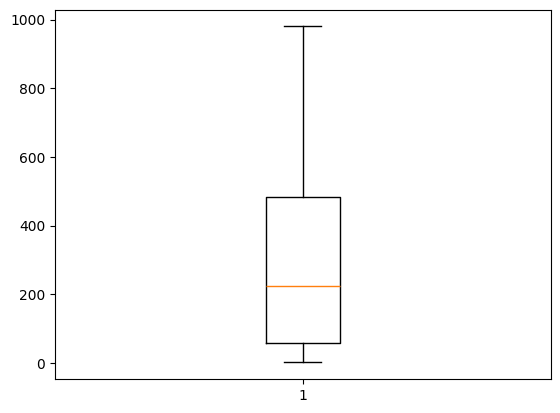

In [42]:
plt.boxplot(df['block'])
plt.show()

In [43]:
# IQR
Q1 = df['block'].quantile(0.25)
Q3 = df['block'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-583.5, 1124.5)

In [44]:
df.block = df.block.clip(lower_bound,upper_bound)

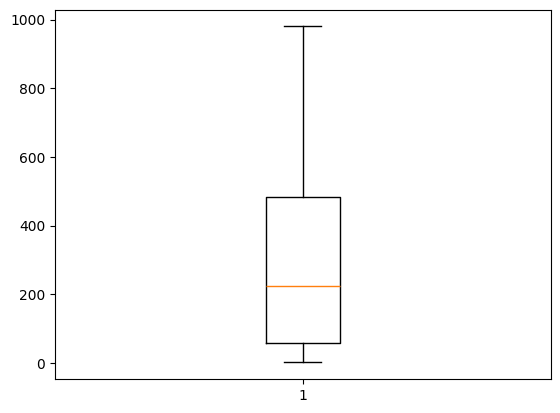

In [45]:
plt.boxplot(df['block'])
plt.show()

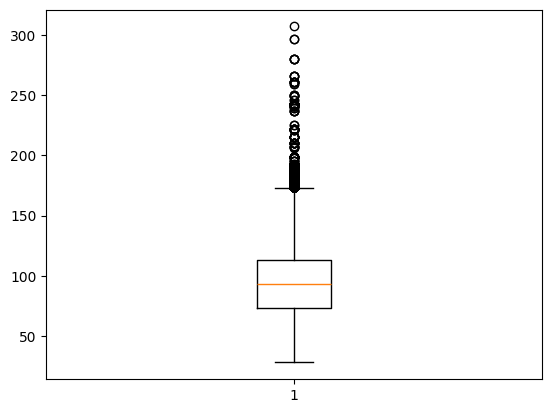

In [46]:
plt.boxplot(df['floor_area_sqm'])
plt.show()

In [47]:
# IQR
Q1 = df['floor_area_sqm'].quantile(0.25)
Q3 = df['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(13.0, 173.0)

In [48]:
df.floor_area_sqm = df.floor_area_sqm.clip(lower_bound,upper_bound)

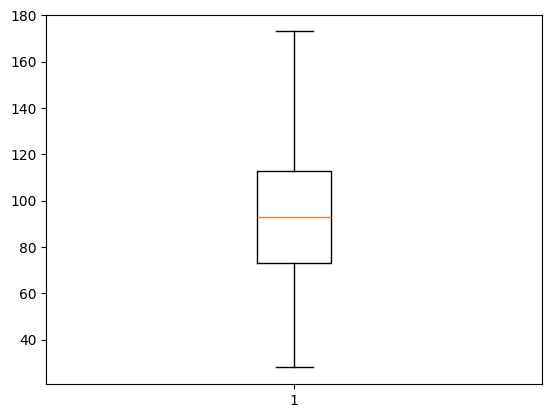

In [49]:
plt.boxplot(df['floor_area_sqm'])
plt.show()

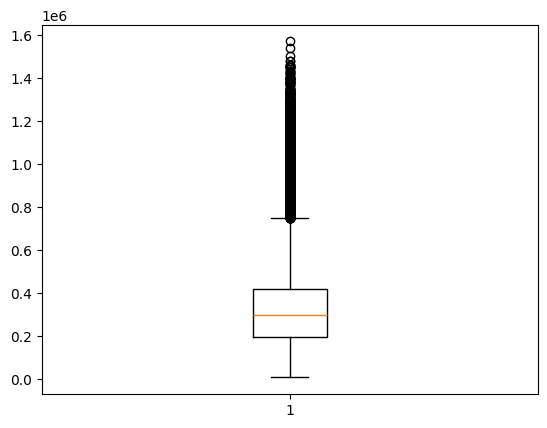

In [50]:
plt.boxplot(df['resale_price'])
plt.show()

In [51]:
# IQR
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-140000.0, 748000.0)

In [52]:
df.resale_price = df.resale_price.clip(lower_bound,upper_bound)

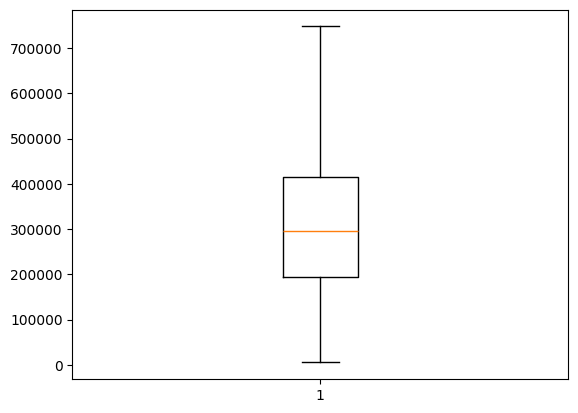

In [53]:
plt.boxplot(df['resale_price'])
plt.show()

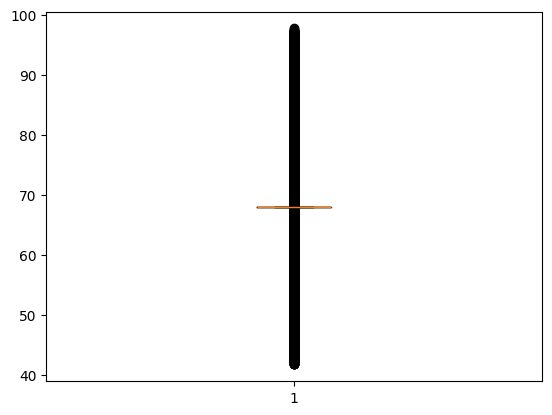

In [54]:
plt.boxplot(df['remaining_lease'])
plt.show()

In [55]:
# IQR
Q1 = df['remaining_lease'].quantile(0.25)
Q3 = df['remaining_lease'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(68.0, 68.0)

In [56]:
df.remaining_lease = df.remaining_lease.clip(lower_bound , upper_bound)

In [57]:
df['resale_price'].value_counts()

resale_price
748000.0    19660
300000.0     6894
350000.0     6807
280000.0     6519
320000.0     6501
            ...  
150188.0        1
175003.0        1
300680.0        1
235880.0        1
335288.0        1
Name: count, Length: 8434, dtype: int64

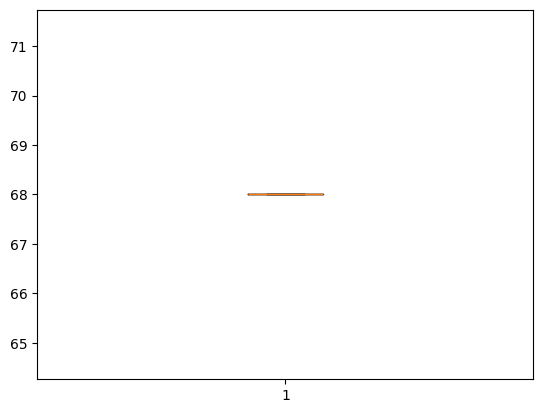

In [58]:
plt.boxplot(df['remaining_lease'])
plt.show()

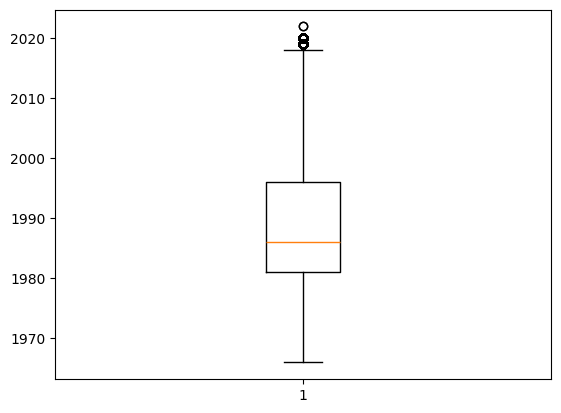

In [59]:
plt.boxplot(df['lease_commence_date'])
plt.show()

In [60]:
# IQR
Q1 = df['lease_commence_date'].quantile(0.25)
Q3 = df['lease_commence_date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(1958.5, 2018.5)

In [61]:
df.lease_commence_date = df.lease_commence_date.clip(lower_bound , upper_bound)

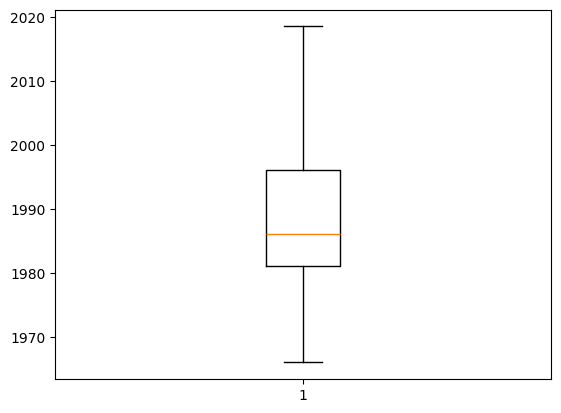

In [62]:
plt.boxplot(df['lease_commence_date'])
plt.show()

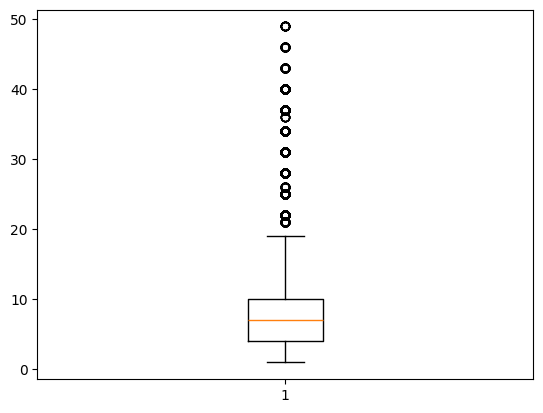

In [63]:
plt.boxplot(df['storey_lower_bound'])
plt.show()

In [64]:
# IQR
Q1 = df['storey_lower_bound'].quantile(0.25)
Q3 = df['storey_lower_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-5.0, 19.0)

In [65]:
df.storey_lower_bound = df.storey_lower_bound.clip(lower_bound , upper_bound)

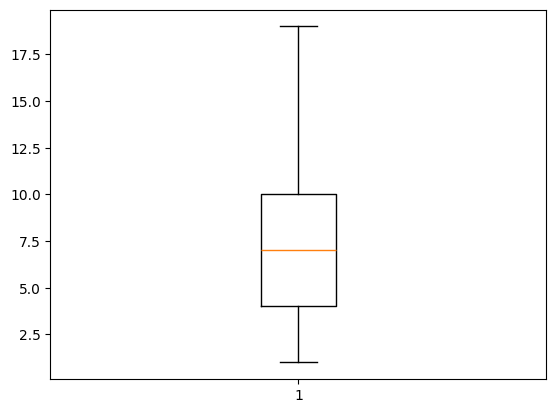

In [66]:
plt.boxplot(df['storey_lower_bound'])
plt.show()

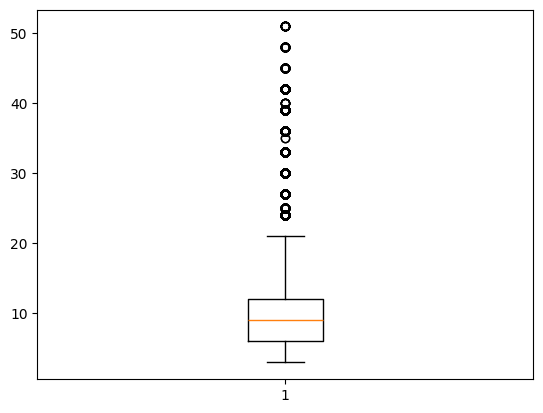

In [67]:
plt.boxplot(df['storey_upper_bound'])
plt.show()

In [68]:
# IQR
Q1 = df['storey_upper_bound'].quantile(0.25)
Q3 = df['storey_upper_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-3.0, 21.0)

In [69]:
df.storey_upper_bound = df.storey_upper_bound.clip(lower_bound , upper_bound)

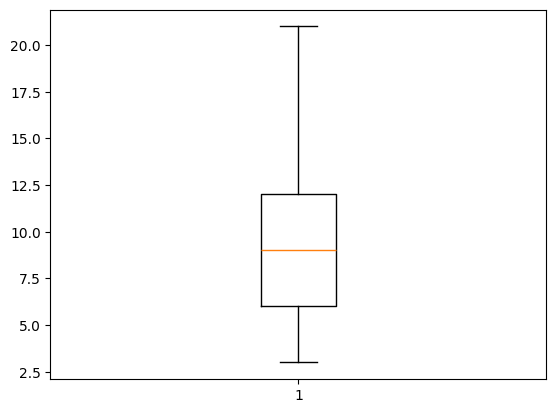

In [70]:
plt.boxplot(df['storey_upper_bound'])
plt.show()

### EDA

In [71]:
object_data = [var for var in df.columns if df[var].dtype == 'object']
object_data

['town', 'flat_type', 'street_name', 'flat_model']

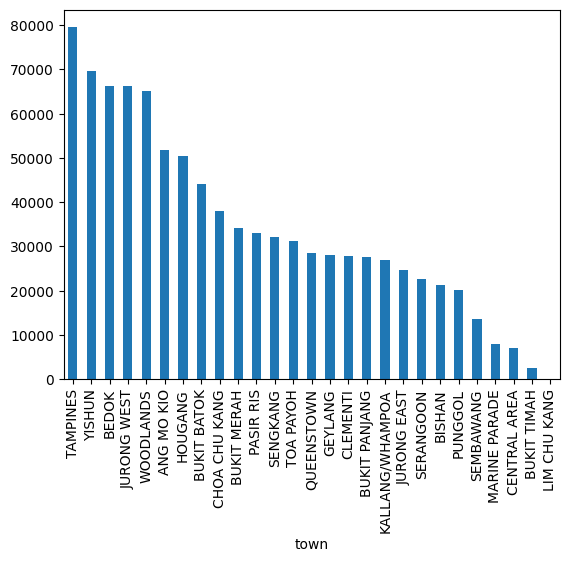

In [72]:
df['town'].value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

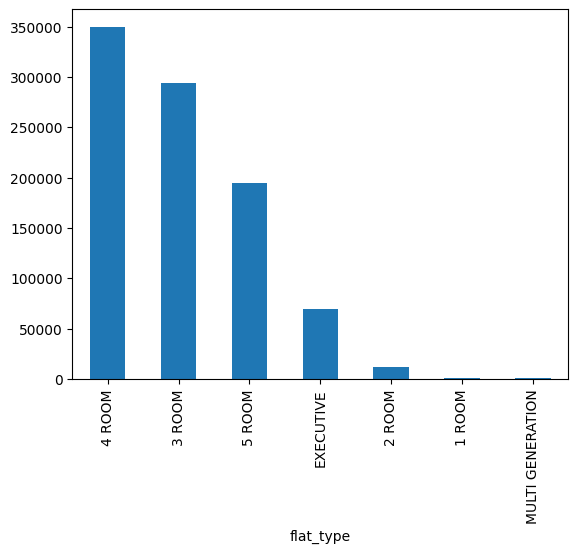

In [73]:
df['flat_type'].value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

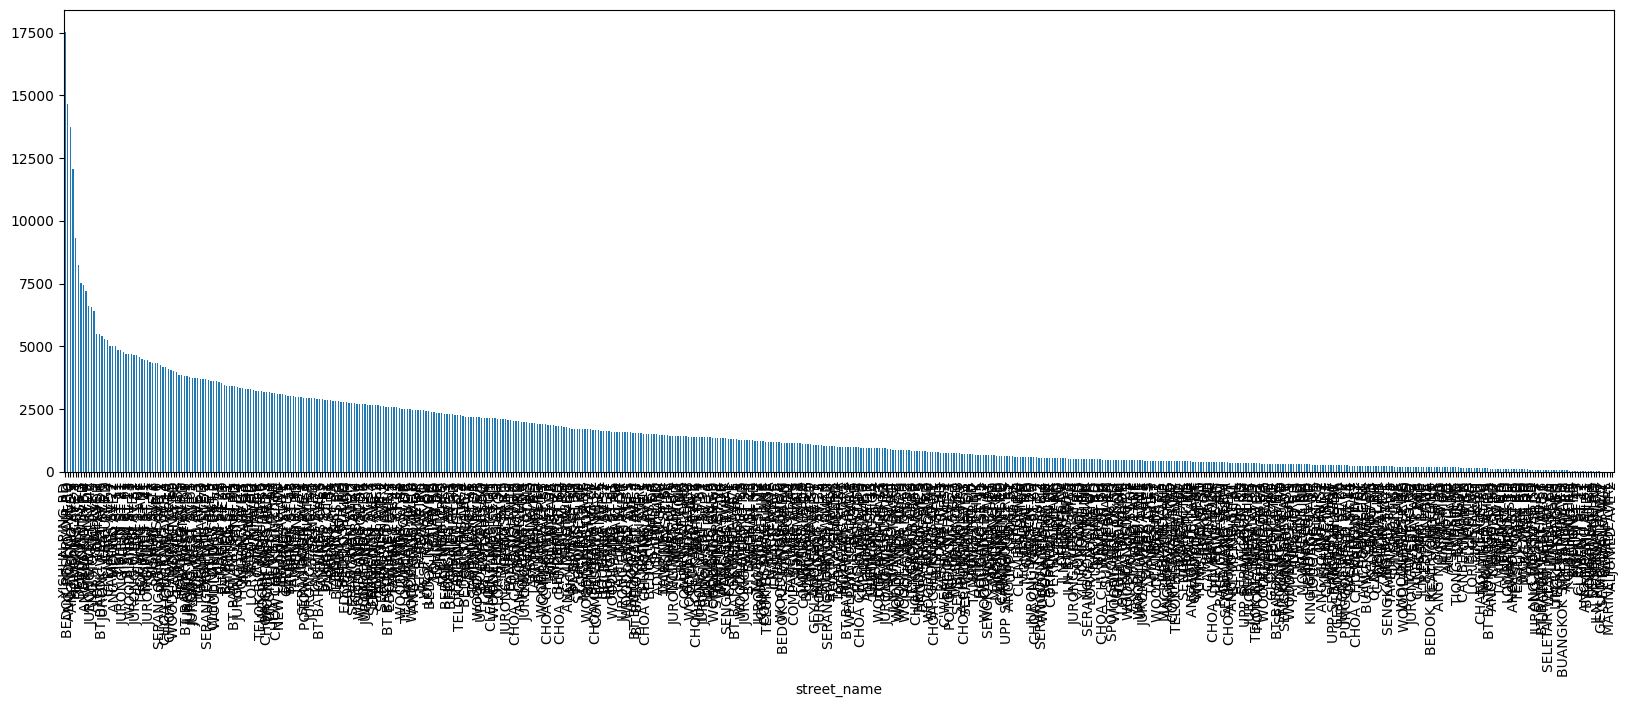

In [74]:
plt.figure(figsize=(20, 6))
df['street_name'].value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

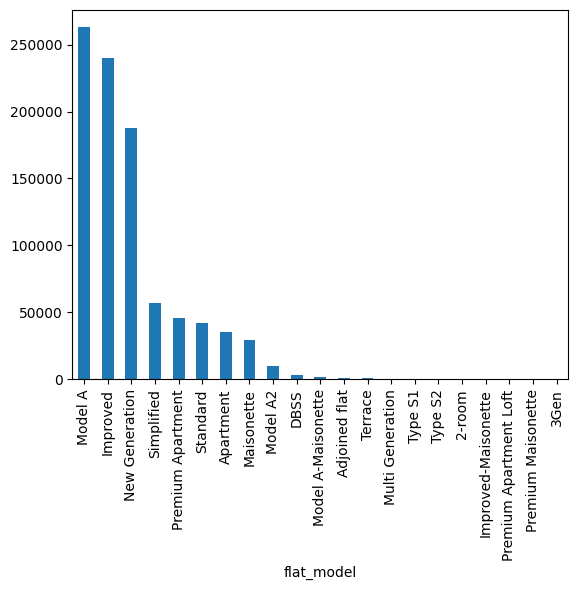

In [75]:
df['flat_model'].value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

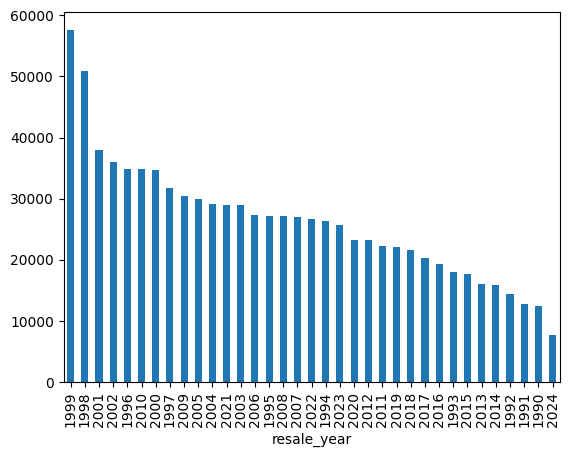

In [76]:
df['resale_year'].value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

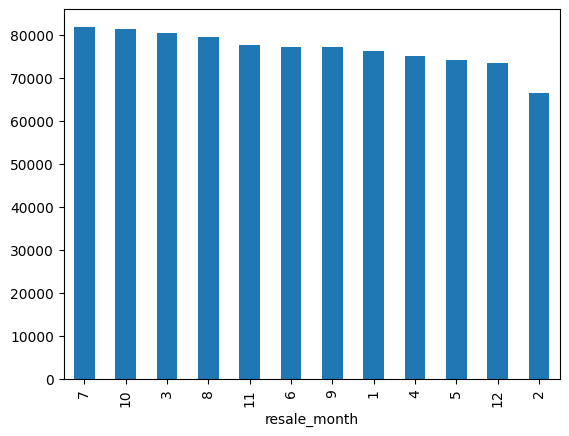

In [77]:
df['resale_month'].value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

## Feature Vs Target (Categorical Data)

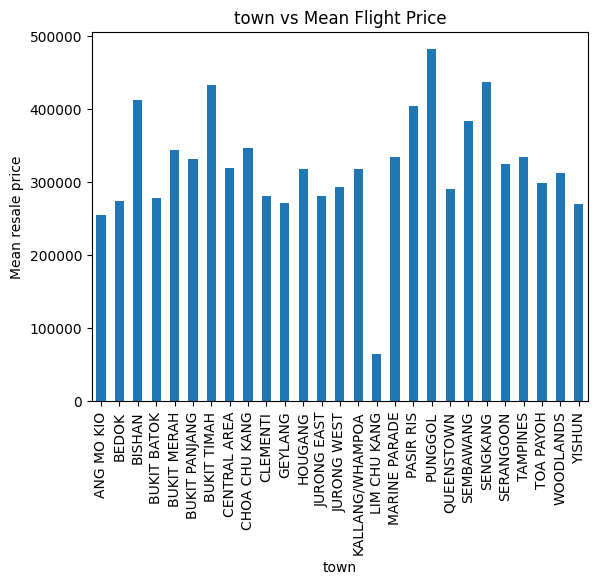

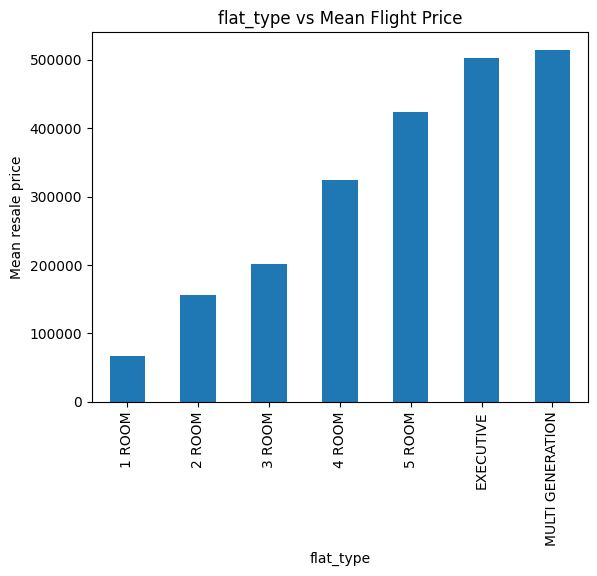

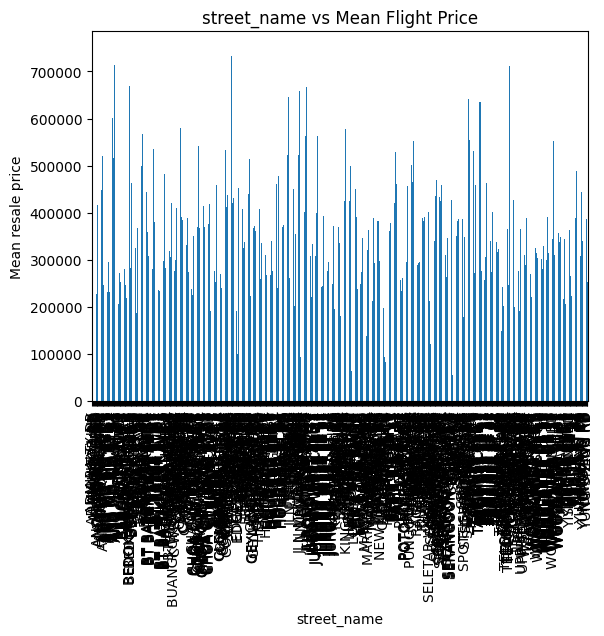

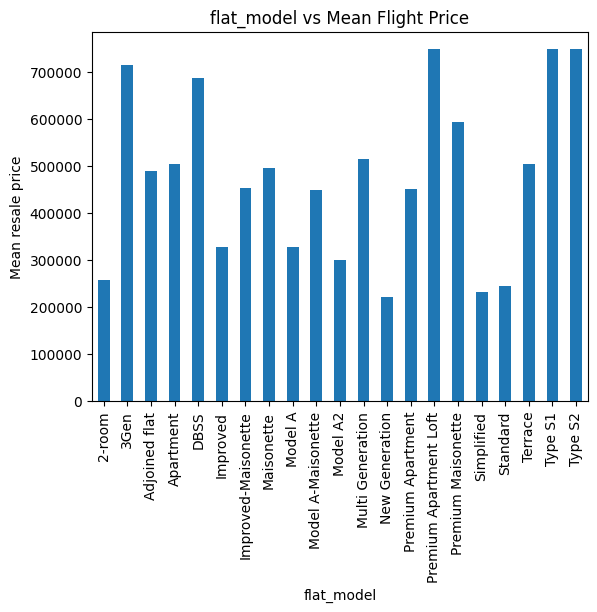

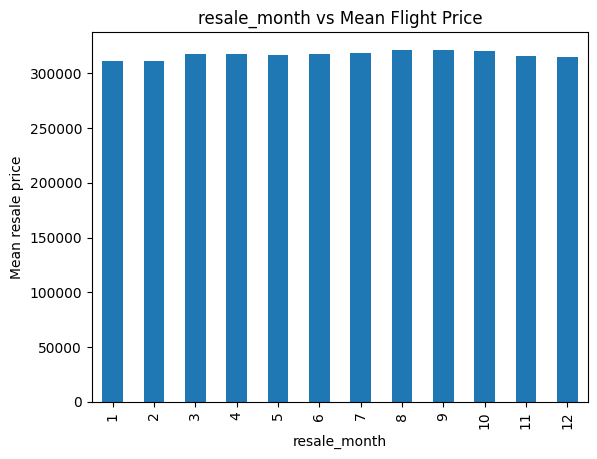

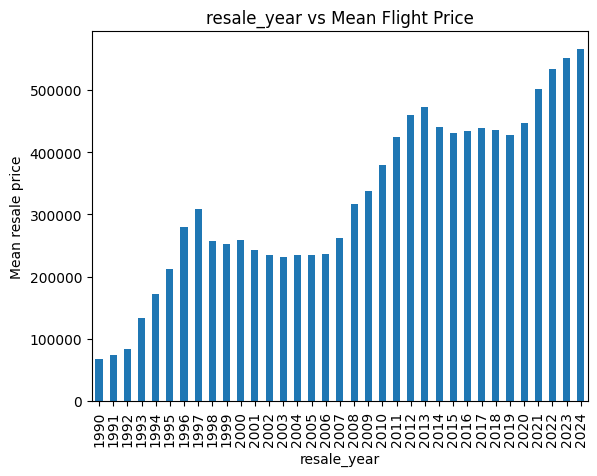

In [78]:
features = ['town','flat_type','street_name','flat_model','resale_month','resale_year']

for feature in features:
    df.groupby(feature)['resale_price'].mean().plot(kind = 'bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale price')
    plt.title(f'{feature} vs Mean Flight Price')
    plt.show()

## Feature Vs Target (Continues Data )

In [79]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease']

In [80]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['resale_year', 'resale_month', 'storey_lower_bound', 'storey_upper_bound']

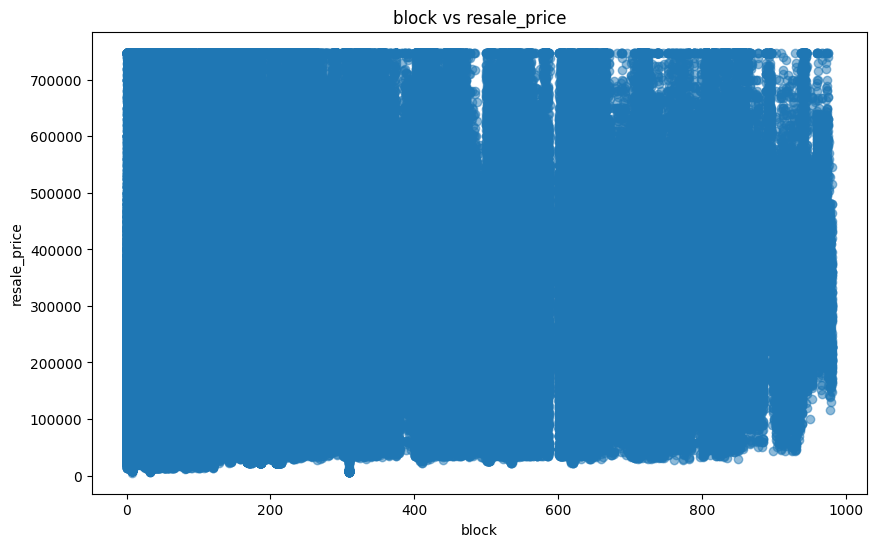

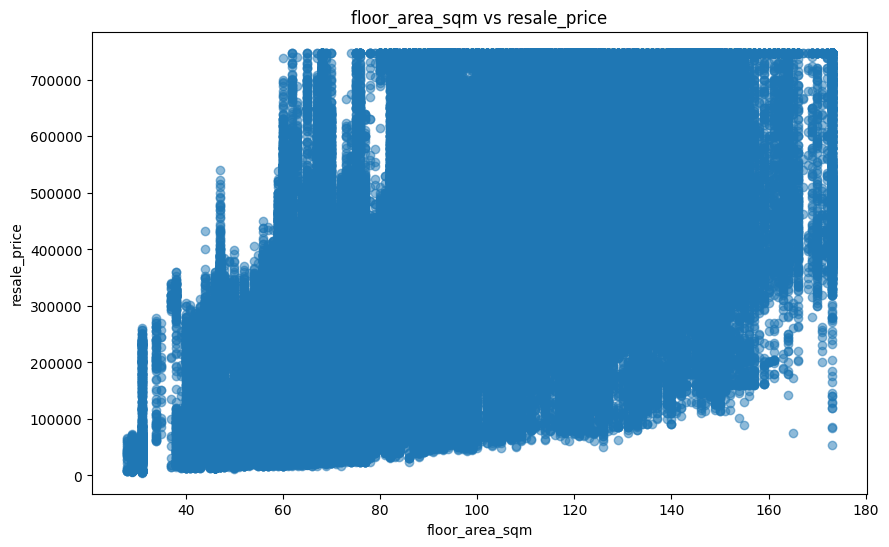

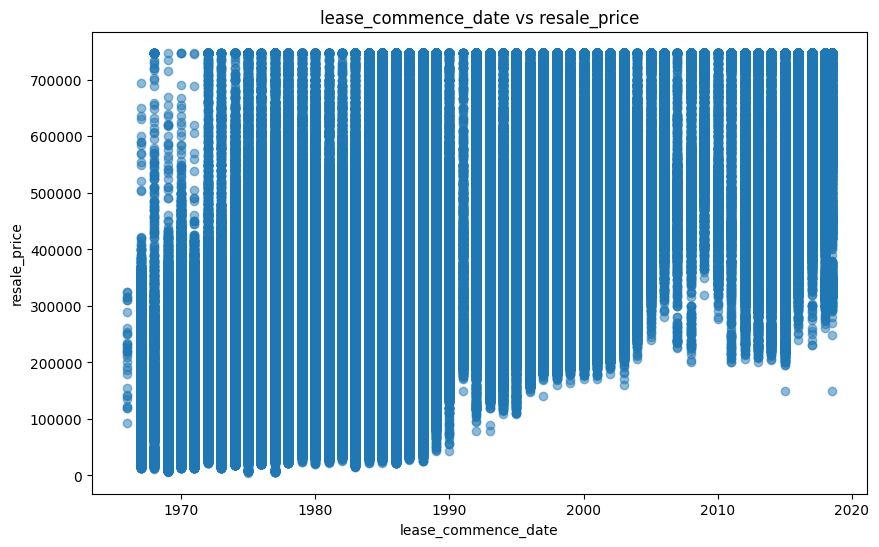

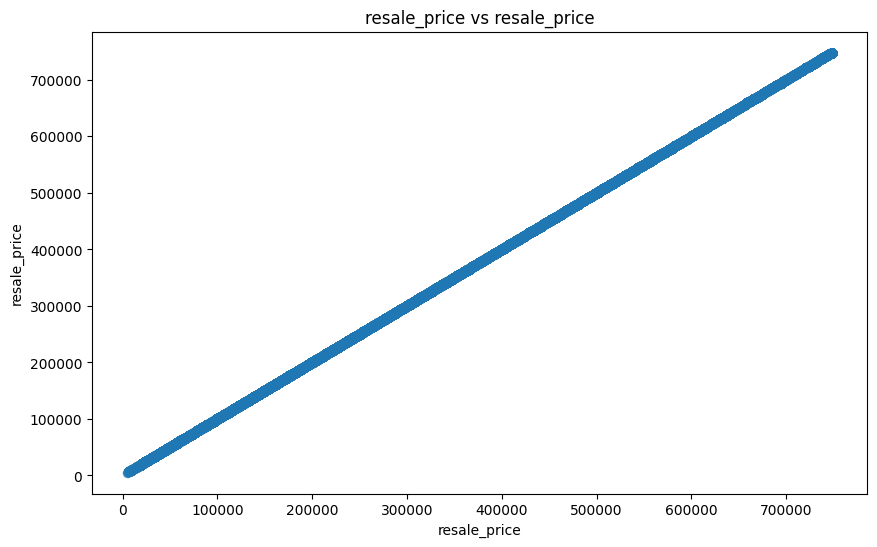

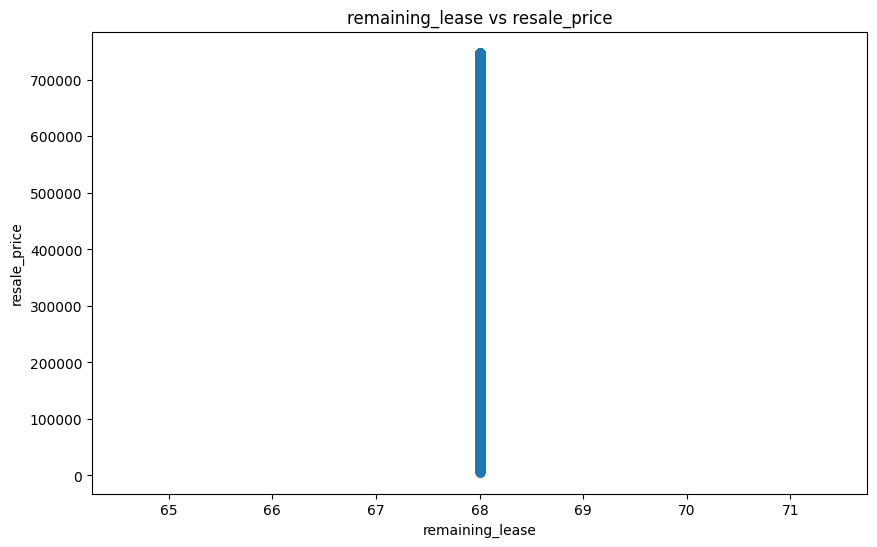

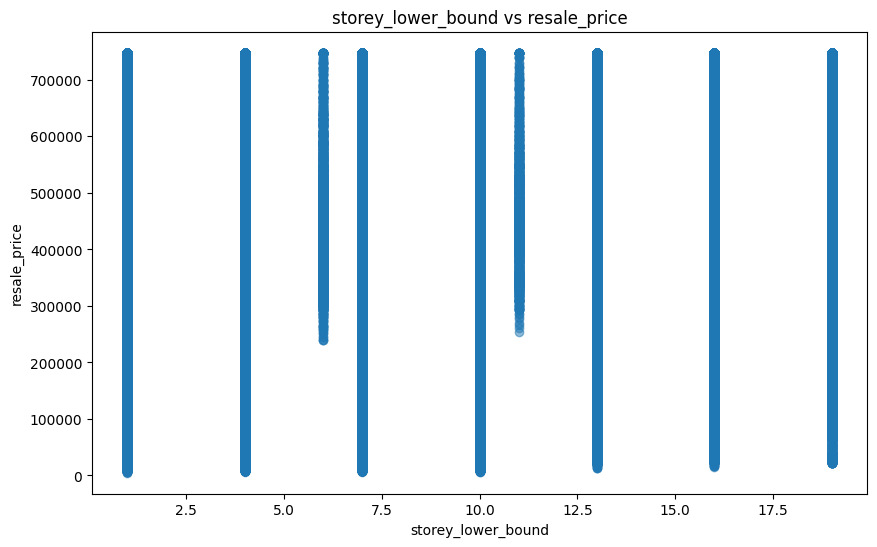

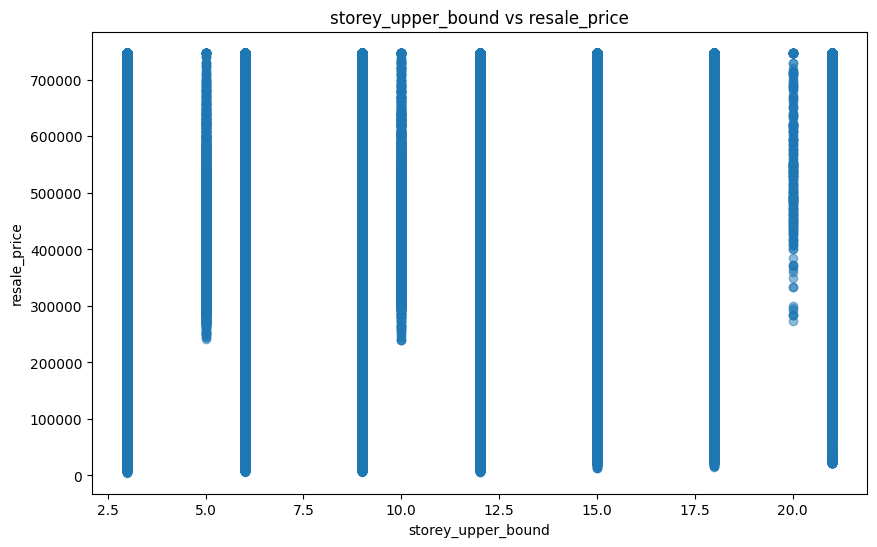

In [81]:
features = [ 'block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease',
'storey_lower_bound', 
'storey_upper_bound']
target = 'resale_price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

In [82]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date    float64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

In [83]:
df.to_csv('Final_filter_data_v2.csv',index=0)

## Encoding Categorical Variables

In [84]:
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [85]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [86]:
# list unique street names
streets = df1['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [87]:
# alter the column with the mapped numbers
df1['street_name'] = df1['street_name'].map(streets_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [88]:
df1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [89]:
category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

# alter the column with the mapped numbers
df1['flat_type'] =df1['flat_type'].map(category_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [90]:
# Create a mapping of 'flat_model' values to numbers
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# Map 'flat_model' values to numbers
df1['flat_model'] =df1['flat_model'].map(flat_model_mapping)

# Display the DataFrame
df1.head(3)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12


In [91]:
# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# Map 'town' values to numbers
df1['town'] = df1['town'].map(town_mapping)

# Display the DataFrame
df1.head(4)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,1,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12
3,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,7,9


In [92]:
# save the processed data for the deployment
df1.to_csv('final_with_label.csv')

# Correlation

In [93]:
# correlation matrix (ranges from 1 to -1)
corrm=df1.corr()
#corrm.to_csv('corrm.csv')
corrm

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
town,1.000000,0.208718,0.051015,0.587582,0.201602,0.163476,0.334138,0.123864,NaN,0.124511,0.004197,-0.019318,-0.019051
flat_type,0.208718,1.000000,0.127854,0.387923,0.954848,0.242980,0.411696,0.603647,NaN,0.101874,0.003479,0.077875,0.078209
block,0.051015,0.127854,1.000000,0.048786,0.187608,-0.002321,0.008537,-0.080404,NaN,-0.114606,0.001508,-0.124135,-0.124178
street_name,0.587582,0.387923,0.048786,1.000000,0.357027,0.354252,0.738953,0.379352,NaN,0.317512,0.007247,0.081057,0.081707
floor_area_sqm,0.201602,0.954848,0.187608,0.357027,1.000000,0.200818,0.390194,0.578453,NaN,0.063704,0.002798,0.044188,0.044377
flat_model,0.163476,0.242980,-0.002321,0.354252,0.200818,1.000000,0.356836,0.246142,NaN,0.162910,0.001962,0.019523,0.019886
lease_commence_date,0.334138,0.411696,0.008537,0.738953,0.390194,0.356836,1.000000,0.542287,NaN,0.429331,0.005608,0.152345,0.152765
resale_price,0.123864,0.603647,-0.080404,0.379352,0.578453,0.246142,0.542287,1.000000,NaN,0.680070,0.009103,0.209111,0.211836
remaining_lease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resale_year,0.124511,0.101874,-0.114606,0.317512,0.063704,0.162910,0.429331,0.680070,NaN,1.000000,-0.021406,0.095926,0.098030


# Heatmap

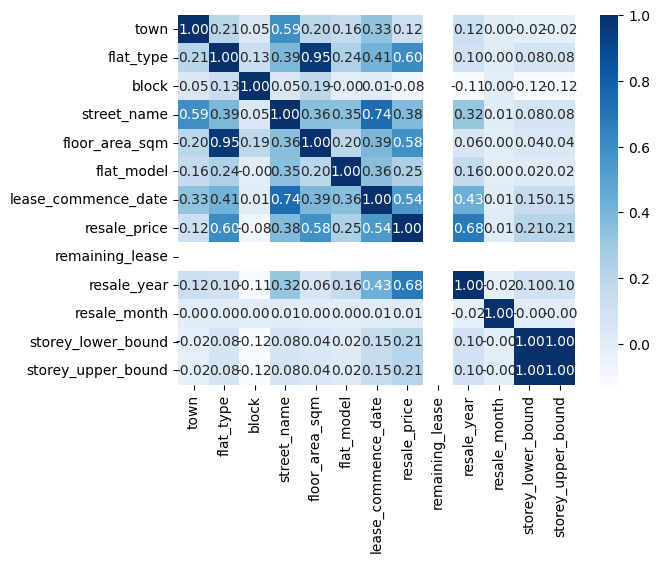

In [94]:
sns.heatmap(corrm,annot = True, cmap='Blues',fmt = '.2f')
plt.show()

## Machine Learning 

### split

In [95]:
X = df1.drop('resale_price',axis = 1)
y = df1['resale_price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 72)

In [96]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(736574, 12) (184144, 12) (736574,) (184144,)


### scaling

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
X_train_scaled

array([[ 1.07013706, -1.06960659, -0.64116621, ..., -0.16305216,
         0.09473613,  0.09147294],
       [-0.59692061, -0.01471261,  0.02918445, ...,  0.12932908,
         0.76972111,  0.76659135],
       [-1.62280226, -0.01471261,  0.96615184, ...,  0.71409156,
         0.09473613,  0.09147294],
       ...,
       [ 1.45484268,  1.04018137, -0.19172657, ..., -0.16305216,
         1.44470609,  1.44170975],
       [ 0.30072583,  1.04018137, -1.0715618 , ..., -1.04019588,
         1.44470609,  1.44170975],
       [-1.23809664, -0.01471261,  0.44434479, ...,  0.71409156,
        -0.58024885, -0.58364546]])

In [99]:
X_test_scaled

array([[ 0.81366665, -0.01471261, -0.30599088, ...,  0.71409156,
         0.76972111,  0.76659135],
       [-1.36633185, -0.01471261, -0.11555035, ...,  1.00647281,
         2.79467605,  2.79194657],
       [-0.3404502 ,  2.09507534,  0.24247784, ...,  1.00647281,
        -1.25523383, -1.25876387],
       ...,
       [-0.08397979,  1.04018137, -1.1096499 , ...,  1.29885405,
         1.44470609,  1.44170975],
       [-1.62280226, -1.06960659,  0.56241792, ...,  0.42171032,
         0.09473613,  0.09147294],
       [ 1.45484268, -0.01471261,  0.79094655, ..., -1.33257712,
        -1.25523383, -1.25876387]])

## Model fit

In [100]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [101]:
linear_model.predict(X_test)

array([448117.01397922, 324342.22025011, 638199.19585858, ...,
       537611.37839998, 207600.38113538, 292884.95638067])

In [102]:
y_test

162536    445000.0
277775    395000.0
137754    710000.0
130127    510000.0
53436     510000.0
            ...   
48103     253000.0
188513    345000.0
17873     505000.0
155091    155000.0
227303    213000.0
Name: resale_price, Length: 184144, dtype: float64

In [103]:
linear_model.score(X_test, y_test)

0.7908267488937637

In [104]:
from sklearn.model_selection import cross_val_score
cross_val_LM = cross_val_score(linear_model,X_train,y_train).mean()
cross_val_LM

0.7907611414641036

## KNN Reg

In [105]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

In [106]:
knn_regressor =  KNeighborsRegressor(n_neighbors = 5)
knn_regressor.fit(X_train_scaled,y_train)

y_pred_knn = knn_regressor.predict(X_test_scaled)
mae_knn = mean_absolute_error(y_test,y_pred_knn)
mse_knn = mean_squared_error(y_test,y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test,y_pred_knn)

print('Mean absolute error:',mae_knn)
print('Mean squared error:' ,mse_knn)
print('Root mean squared error:', rmse_knn)
print('R2 score:', r2_knn)

Mean absolute error: 28711.88808329351
Mean squared error: 1743037003.6648672
Root mean squared error: 41749.69465355246
R2 score: 0.9335904579963412


In [107]:
knn_regressor =  KNeighborsRegressor(n_neighbors = 5)
knn_regressor.fit(X_train,y_train)

y_pred_knn = knn_regressor.predict(X_test)
mae_knn = mean_absolute_error(y_test,y_pred_knn)
mse_knn = mean_squared_error(y_test,y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test,y_pred_knn)

print('Mean absolute error:',mae_knn)
print('Mean squared error:' ,mse_knn)
print('Root mean squared error:', rmse_knn)
print('R2 score:', r2_knn)

Mean absolute error: 28945.12049619863
Mean squared error: 1660906506.6607878
Root mean squared error: 40754.22072204041
R2 score: 0.936719622023901


## Decision Tree Reg

In [108]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor =  DecisionTreeRegressor()
dt_regressor.fit(X_train,y_train)

y_pred_dt = dt_regressor.predict(X_test)
mae_dt = mean_absolute_error(y_test,y_pred_dt)
mse_dt = mean_squared_error(y_test,y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test,y_pred_dt)

print('Mean absolute error:',mae_dt)
print('Mean squared error:' ,mse_dt)
print('Root mean squared error:', rmse_dt)
print('R2 score:', r2_dt)

Mean absolute error: 18383.323667962755
Mean squared error: 731818344.1880095
Root mean squared error: 27052.141212628798
R2 score: 0.97211779155278


## Random Forest regression

In [109]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor =  RandomForestRegressor()
rf_regressor.fit(X_train,y_train)

y_pred_rf = rf_regressor.predict(X_test)
mae_rf = mean_absolute_error(y_test,y_pred_rf)
mse_rf = mean_squared_error(y_test,y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test,y_pred_rf)

print('Mean absolute error:',mae_rf)
print('Mean squared error:' ,mse_rf)
print('Root mean squared error:', rmse_rf)
print('R2 score:', r2_rf)

Mean absolute error: 13799.821810273334
Mean squared error: 397173596.50368685
Root mean squared error: 19929.214648442292
R2 score: 0.9848677242168135


## Xg Boost Regression

In [110]:
from xgboost import XGBRegressor 

xg_regressor =  XGBRegressor()
xg_regressor.fit(X_train,y_train)

y_pred_xg = xg_regressor.predict(X_test)
mae_xg = mean_absolute_error(y_test,y_pred_xg)
mse_xg = mean_squared_error(y_test,y_pred_xg)
rmse_xg = np.sqrt(mse_xg)
r2_xg = r2_score(y_test,y_pred_xg)

print('Mean absolute error:',mae_xg)
print('Mean squared error:' ,mse_xg)
print('Root mean squared error:', rmse_xg)
print('R2 score:', r2_xg)

Mean absolute error: 16848.50297521248
Mean squared error: 557682554.9935929
Root mean squared error: 23615.303406765557
R2 score: 0.9787523483536581


## Final model

In [111]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [112]:
models = ['KNeighborsRegressor','DecisionTreeRegressor','RandomForestRegressor','XGBRegressor']
scores = [r2_knn,r2_dt,r2_rf,r2_xg]

fig=px.bar(x=models, y=scores,title='R_2 of Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(scores)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, scores):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

KNeighborsRegressor 0.936719622023901
DecisionTreeRegressor 0.97211779155278
RandomForestRegressor 0.9848677242168135
XGBRegressor 0.9787523483536581

Model: RandomForestRegressor contain Maximum R2_Score: 0.9848677242168135 


## save model

In [113]:
model=rf_regressor.fit(X_train, y_train)

In [114]:
import pickle
# save the model to disk
filename = 'RandomForestRegressor_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Saved {filename} model to disk")

Saved RandomForestRegressor_model.pkl model to disk


In [115]:
rf_regressor.feature_importances_

array([0.04218955, 0.05055104, 0.01458699, 0.02295159, 0.28288845,
       0.00772582, 0.03289448, 0.        , 0.5285291 , 0.00655366,
       0.00454392, 0.0065854 ])

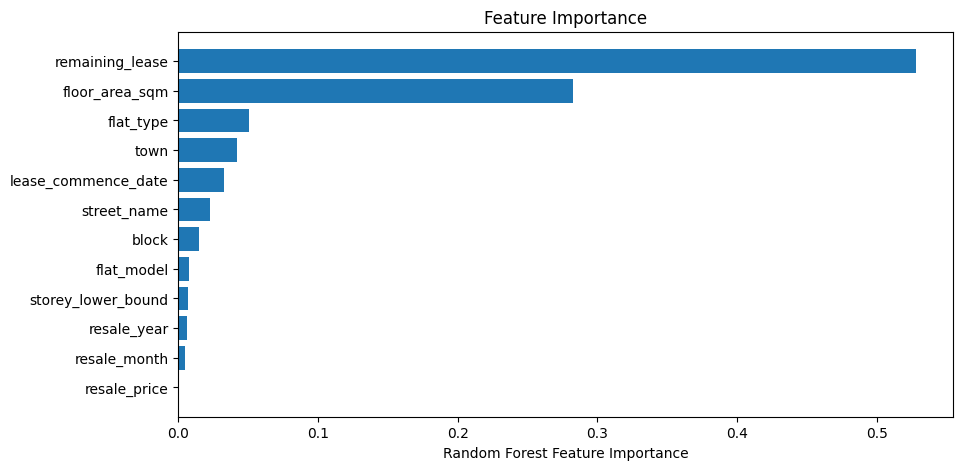

In [116]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

plt.show()


In [117]:
# get sample to predict the resale price
pre_df =df1.sample(n=5)
pre_df
     

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
218170,22,5,821.0,305,127.0,14,1987.0,295000.0,68.0,2006,9,10,12
98691,12,5,265.0,450,121.0,14,1998.0,580000.0,68.0,2021,2,1,3
265182,4,3,347.0,277,64.0,19,1988.0,205000.0,68.0,2008,7,1,3
148232,16,3,5.0,172,67.0,15,1979.0,197000.0,68.0,1997,1,4,6
126554,14,3,15.0,503,62.0,16,2004.0,538000.0,68.0,2022,5,19,21


In [118]:
# drop the resale price column
A = pre_df.drop('resale_price', axis = 1)

In [119]:
# Make predictions on the sample
pre_pred = rf_regressor.predict(A)
pre_pred

array([299268.88      , 566820.        , 197318.        , 197707.66666667,
       542454.432     ])